### DSTA


#### Chapter I - Food Webs: in-class exercises

##### This exercise notebook is taken from the (Python 2) notebook for Ch. 1 of Caldarelli-Cheesa's textbook (CC).

Please also see the [online NetworkX manuals](https://networkx.org/documentation/stable/index.html).

#### Getting Started

In [30]:
# check the running Python version
import sys
print(sys.version)

3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]


In [31]:
# import the required modules

import numpy as np
import matplotlib.pyplot as plt

# this my require installation
import networkx as nx


#### Instantiate a simple Adjacency Matrix

In [32]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]

###  Q1. Draw an undirected graph from an adjacency matrix

### Browsing the rows

In [33]:
for row in adjacency_matrix:
    print(row)

[0, 1, 0, 1]
[1, 0, 1, 1]
[0, 1, 0, 0]
[1, 1, 0, 0]


### Browsing the link information

In [34]:
for row in adjacency_matrix:
    for a_ij in row:
        print(a_ij,end=" ")
        
    print("\r")

0 1 0 1 
1 0 1 1 
0 1 0 0 
1 1 0 0 


### Directed Networks

###  Q2. Draw the directed graph from an adjacency matrix

In [35]:
"""
With directed networks, the adjacency matrix is not symmetric, like for Food Web
So, if a non-zero element is present in row 2, column 3, this means there is an 
arc (directed edge) from node 2 toward node 3
"""

adjacency_matrix_directed=[
                  [0,1,0,1],
                  [0,0,1,0],
                  [0,0,0,1],
                  [0,0,0,0]
                  ]

## Basic Statistics

In [36]:
#the number of species is the number of rows or columns of 
#the adjacency matrix
num_species=len(adjacency_matrix_directed[0])

#the number of links or predations is the non zero elements 
#of the adjacency matrix (this holds for directed graphs
num_predations=0
for i in range(num_species):
    for j in range(num_species):
        if adjacency_matrix_directed[i][j]!=0:
            num_predations=num_predations+1

#to check if a specie is a Basal (B), an Intermediate (I) or
#a Top (T) one  we have to check the presence of 1s both in 
#the row and in the column of each specie
row_count=[0,0,0,0]
column_count=[0,0,0,0]
for i in range(num_species):
    for j in range(num_species):
        row_count[i]=row_count[i]+adjacency_matrix_directed[i][j]
        column_count[j]=column_count[j]+ \
        adjacency_matrix_directed[i][j]

number_B=0
number_I=0
number_T=0

for n in range(num_species):
    if row_count[n]==0:
        number_T+=1
        continue
    if column_count[n]==0:
        number_B+=1
        continue
    else:
        number_I+=1
   
print("number of species", num_species)
print("number of predations", num_predations)
print("classes Basal, Top, Intermediate: ",number_B,number_T,number_I)
print("connectance", float(num_predations)/float(num_species**2))

number of species 4
number of predations 4
classes Basal, Top, Intermediate:  1 1 2
connectance 0.25


## The Degree

In [37]:
#for the undirected network
degree_node_2=0
for j in adjacency_matrix[1]:
    degree_node_2=degree_node_2+j
print ("degree of node 2:",degree_node_2)

#and for the directed case we already calculated the sum over 
#the rows and columns for the adjacency_matrix_directed
out_degree_node_3=row_count[2]
in_degree_node_4=column_count[3]

print( "out_degree node 3:",out_degree_node_3)
print ("in_degree node 4:",in_degree_node_4)

degree of node 2: 3
out_degree node 3: 1
in_degree node 4: 2


###  Q3. Draw the histogram of degree distribution from adjacency matrix

In [38]:
#plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

## Degree in Networkx

In [39]:
import networkx as nx

#generate an empty graph
G=nx.Graph()

#define the nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

#link the nodes
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)

#degree of the node 2
print(G.degree(2))

3


###  Q4. Draw the graph and degree distribution histogram for the above. 

## Clustering Coefficient

In [40]:
row=1 #stands for the node 2
node_index_count=0
node_index_list=[]
for a_ij in adjacency_matrix[row]:
    if a_ij==1:
        node_index_list.append(node_index_count)

    node_index_count=node_index_count+1    
    
print("\r")

print(node_index_list)

#then we will check for all the possible neighbours couples if a link actually exist:

neighb_conn=0
for n1 in node_index_list:
    for n2 in node_index_list:
        if adjacency_matrix[n1][n2]==1:
            neighb_conn=neighb_conn+1
   
#we have indeed counted them twice...
neighb_conn=neighb_conn/2.0

print(neighb_conn)

#Finally the clustering coefficient for node '2' is given by the expression:

clustering_coefficient=neighb_conn/ \
(degree_node_2*(degree_node_2-1)/2.0) 

print(clustering_coefficient)


[0, 2, 3]
1.0
0.3333333333333333


#### Compute distance with Breadth-first Search

A quick introduction to Breadth-First Search (BFS) can be found on [Geeksforgeeks](https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/) and [Wikipedia](https://en.wikipedia.org/wiki/Breadth-first_search).

#### Create the undirected graph

('B', 'C') 




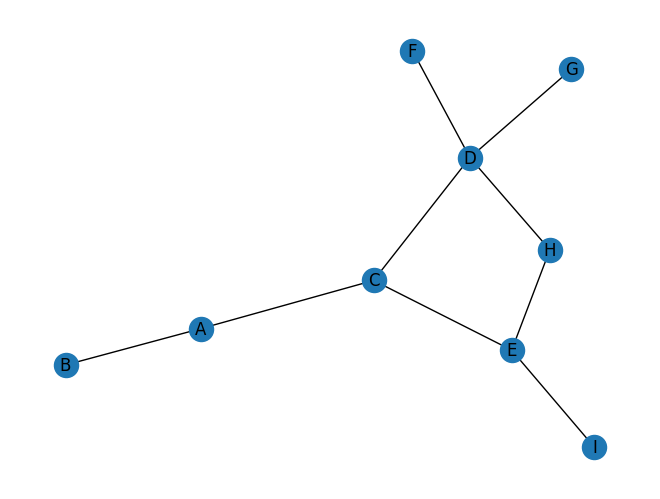

In [41]:
GU = nx.Graph()

GU.add_edges_from([
    ('A','B'),
    ('A','C'),
    ('C','D'),
    ('C','E'),
    ('D','F'),
    ('D','H'),
    ('D','G'),
    ('E','H'),
    ('E','I')
    ])

# Example of printing neighbors of a node 'A'
print(tuple(GU.neighbors('A')), "\n\n")

nx.draw(GU, with_labels=True)

In [42]:
# Each graph node has an empty dictionary
print(GU.nodes["C"])
list(GU.neighbors("C"))

{}


['A', 'D', 'E']

In [44]:
root_node = 'A'

queue = []
queue.append('A')

# Distance of root node vs itself
GU.nodes['A']["distance"] = 0

while len(queue):
    working_node = queue.pop(0)

    # Uncomment the following 2 lines to print more output
    # print(f"Working Node: {working_node}")
    # print(f"{working_node} Neighbors: {list(GU.neighbors(working_node))}")

    # Iterate through current node neighbors
    for n in GU.neighbors(working_node):
        if len(GU.nodes[n]) == 0:  # Checks if a distance has been assigned
            GU.nodes[n]["distance"] = GU.nodes[working_node]["distance"] + 1
            queue.append(n)
            
for n in GU.nodes():
    print (n, GU.nodes[n]["distance"])

A 0
B 1
C 1
D 2
E 2
F 3
H 3
G 3
I 3


In [ ]:
GU.nodes["B"]

## Reading files with Food Web data

In [ ]:
# This is one of the wet areas presented in Ch. 1
FILE = "./data/Little_Rock_Lake.txt"

In [ ]:


DG = nx.DiGraph()

in_file=open(FILE,'r')
while True:
    next_line=in_file.readline()
    if not next_line:
        break

    next_line_fields=next_line[:-2].split(' ')
    node_a=next_line_fields[1] #there is a space in the beginning 
                               #of each edge
    node_b=next_line_fields[2]
    print(node_a,node_b)
    DG.add_edge(node_a, node_b)

###  Q5. Draw the graph and degree distribution histogram for the above. 

## Trophic Species

## Defining the trophic pattern key
this is a way to generate a unique key starting from the ordered lists of preys and predators attached to nodes

In [ ]:
def get_node_key(node):
    out_list=[]
    for out_edge in DG.out_edges(node):
        out_list.append(out_edge[1])
    in_list=[]

    for in_edge in DG.in_edges(node):
        in_list.append(in_edge[0])
    out_list.sort()
    out_list.append('-')
    in_list.sort()
    out_list.extend(in_list)
    
    return out_list

## Grouping the Trophic Species and Regenerating the Trophic network

In [ ]:
def TrophicNetwork(DG):
    trophic={}
    for n in DG.nodes():
        k=tuple(get_node_key(n))
        if not k in trophic:
            trophic[k]=[]

        trophic[k].append(n)
    for specie in trophic.keys():
        if len(trophic[specie])>1:
            for n in trophic[specie][1:]:
                DG.remove_node(n)

    return DG

#deleting the environment
#DG.remove_node('0')

TrophicDG=TrophicNetwork(DG)
print("S:",TrophicDG.number_of_nodes())
print("L:",TrophicDG.number_of_edges())
print("L/S:",float(TrophicDG.number_of_edges())/ \
TrophicDG.number_of_nodes())

## Classes in Food Webs

In [ ]:
def compute_classes(DG):
    basal_species=[]
    top_species=[]
    intermediate_species=[]
    for n in DG.nodes():
        if DG.in_degree(n)==0:
            basal_species.append(n)
        elif DG.out_degree(n)==0:
            top_species.append(n)
        else:
            intermediate_species.append(n)
            
    return (basal_species,intermediate_species,top_species)

(B,I,T)=compute_classes(TrophicDG)
print ("B:",float(len(B))/(len(B)+len(T)+len(I)))
print ("I:",float(len(I))/(len(B)+len(T)+len(I)))
print ("T:",float(len(T))/(len(B)+len(T)+len(I)))

B: 0.68
I: 0.3
T: 0.02


## Proportion of links among classes and ratio prey/predators

In [ ]:
def InterclassLinkProportion(DG,C1,C2):
    count=0
    for n1 in C1:
        for n2 in C2:
            if DG.has_edge(n1,n2):
                count+=1
    return float(count)/DG.number_of_edges()
    
print("links in BT:",InterclassLinkProportion(TrophicDG,B,T))
print("links in BI:",InterclassLinkProportion(TrophicDG,B,I))
print("links in II:",InterclassLinkProportion(TrophicDG,I,I))
print("links in IT:",InterclassLinkProportion(TrophicDG,I,T))

#Ratio prey/predators
print("P/R:",float((len(B)+len(I)))/(len(I)+len(T)))

links in BT: 0.12437810945273632
links in BI: 0.6467661691542289
links in II: 0.15422885572139303
links in IT: 0.07462686567164178
P/R: 3.0625
